In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf

In [ ]:
data_load = np.loadtxt("/content/drive/MyDrive/data.txt")

In [ ]:
data= data_load.reshape(50, 50, 250)

In [ ]:
def plotheatmap(u_k, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperature at t = {k:.3f} unit time")
  plt.xlabel("x")
  plt.ylabel("y")

  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
  plt.colorbar()

  return plt

In [ ]:
def animate(k):
  plotheatmap(data[:, :, k], k)

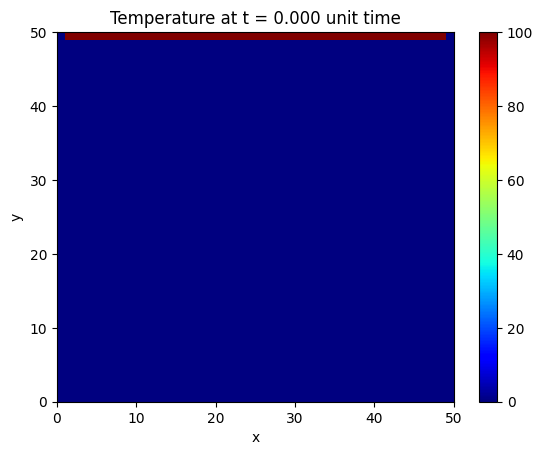

In [ ]:
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=250, repeat=False)
anim.save("heat_equation_solution.gif")

In [ ]:
# Set data type
DTYPE='float64'
tf.keras.backend.set_floatx(DTYPE)

# Set random seed for reproducible results
tf.random.set_seed(0)

u(x1, x2, t)

x1, x2 => coordenadas espaciais

t => tempo

In [ ]:
# Define initial condition
def fun_u_0(x_0, x_1):
    return tf.zeros((x_0.shape[0], 1), DTYPE)

# Define boundary condition for left, right, down
def fun_u_b(x):
    return tf.zeros((x,1), dtype=DTYPE)

# Define boundary condition for up
def fun_u_b_upper(x):
    return tf.ones((x,1), dtype=DTYPE) * 100

# Define residual of the PDE
def fun_r(t, x, u, u_t, u_xx, u_yy):
    return u_t - (u_xx + u_yy)

In [ ]:
# Set number of data points
N_0 = 2000 #initial condition
N_b = 100 #boundary
N_r = 10000 #colocation points

# Set boundary
tmin = 0.
tmax = 1

xmin = 0.
xmax = 1

In [ ]:
# Lower bounds
lb = tf.constant([tmin, xmin, xmin], dtype=DTYPE)
# Upper bounds
ub = tf.constant([tmax, xmax, xmax], dtype=DTYPE)

In [ ]:
t_0 = tf.ones((N_0, 1), dtype=DTYPE) * lb[0]

x_0 = tf.random.uniform((N_0, 1), lb[1], ub[1], dtype=DTYPE)
y_0 = tf.random.uniform((N_0, 1), lb[2], ub[2], dtype=DTYPE)

X_0 = tf.concat([t_0, x_0, y_0], axis=1)

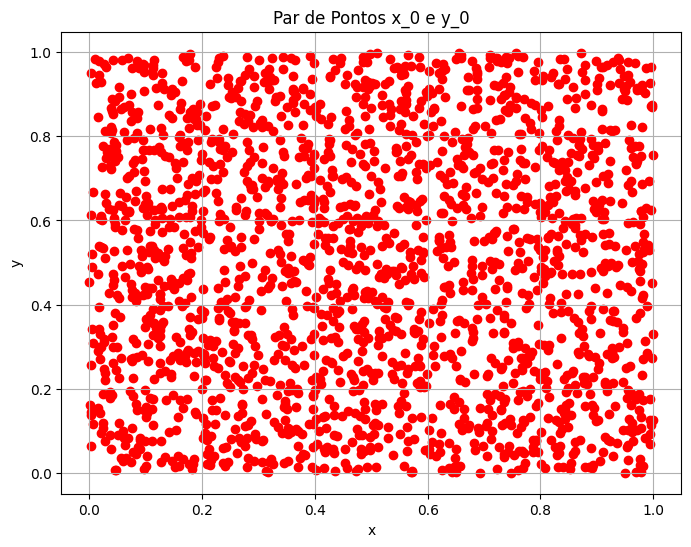

In [ ]:
x_0_np = x_0.numpy().flatten()
y_0_np = y_0.numpy().flatten()

plt.figure(figsize=(8, 6))
plt.scatter(x_0_np, y_0_np, c='r', marker='o')
plt.title('Par de Pontos x_0 e y_0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate intitial condition
u_0 = fun_u_0(x_0, y_0)

In [ ]:
# Boundary data
t_b = tf.random.uniform((N_b,1), lb[0], ub[0], dtype=DTYPE)

v1 = tf.zeros((N_b,1), DTYPE)
v2 = tf.ones((N_b,1), DTYPE)
x_0 = tf.random.uniform((N_b, 1), lb[1], ub[1], dtype=DTYPE)
y_0 = tf.random.uniform((N_b, 1), lb[2], ub[2], dtype=DTYPE)

X_b_left = tf.concat([t_b, v1, y_0], axis=1)
X_b_right = tf.concat([t_b, v2, y_0], axis=1)
X_b_down = tf.concat([t_b, x_0, v1], axis=1)
X_b_up = tf.concat([t_b, x_0, v2], axis=1)

# Evaluate boundary condition at (t_b,x_b)
u_b_left = fun_u_b(N_b)
u_b_right = fun_u_b(N_b)
u_b_down = fun_u_b(N_b)
u_b_up = fun_u_b_upper(N_b)

In [ ]:
# Draw uniformly sampled collocation points
t_r = tf.random.uniform((N_r,1), lb[0], ub[0], dtype=DTYPE)
x_r = tf.random.uniform((N_r,1), lb[1], ub[1], dtype=DTYPE)
y_r = tf.random.uniform((N_r,1), lb[2], ub[2], dtype=DTYPE)
X_r = tf.concat([t_r, x_r, y_r], axis=1)

In [ ]:
X_data = [X_0, X_b_left, X_b_right, X_b_down, X_b_up]
u_data = [u_0, u_b_left, u_b_right, u_b_down, u_b_up]

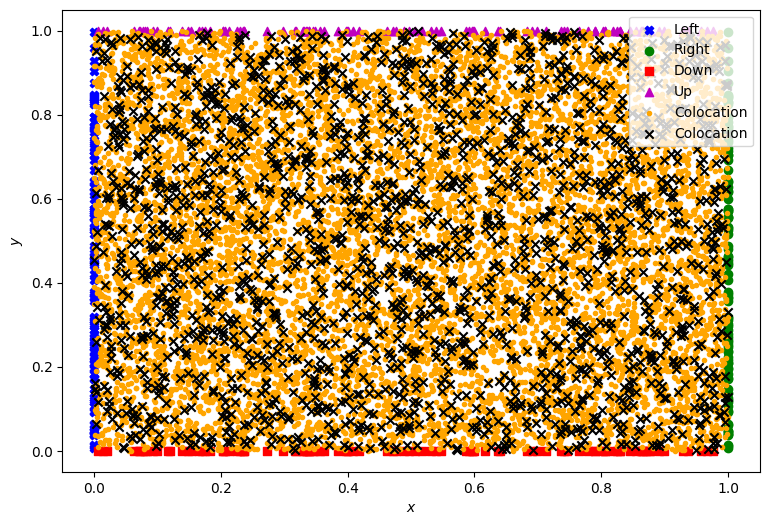

In [ ]:
X_b_left_np = X_b_left.numpy()
X_b_right_np = X_b_right.numpy()
X_b_down_np = X_b_down.numpy()
X_b_up_np = X_b_up.numpy()
X_r_np = X_r.numpy()
X_0_np = X_0.numpy()

# Extraia as colunas necessárias
x_left = X_b_left_np[:, 1]
y_left = X_b_left_np[:, 2]

x_right = X_b_right_np[:, 1]
y_right = X_b_right_np[:, 2]

x_down = X_b_down_np[:, 1]
y_down = X_b_down_np[:, 2]

x_up = X_b_up_np[:, 1]
y_up = X_b_up_np[:, 2]

x_r_new = X_r_np[:, 1]
y_r_new = X_r_np[:, 2]

x_0_new = X_0_np[:, 1]
y_0_new = X_0_np[:, 2]

# Faça o plot
plt.figure(figsize=(9, 6))

plt.scatter(x_left, y_left, c='b', marker='X', label='Left')
plt.scatter(x_right, y_right, c='g', marker='o', label='Right')
plt.scatter(x_down, y_down, c='r', marker='s', label='Down')
plt.scatter(x_up, y_up, c='m', marker='^', label='Up')
plt.scatter(x_r_new, y_r_new, c='orange', marker='.', label='Colocation')
plt.scatter(x_0_new, y_0_new, c='black', marker='x', label='initial')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [ ]:
def init_model(num_hidden_layers=9, num_neurons_per_layer=20):
    # Initialize a feedforward neural network
    model = tf.keras.Sequential()

    # Input is two-dimensional (time + one spatial dimension)
    model.add(tf.keras.Input(3))

    # Introduce a scaling layer to map input to [lb, ub]
    scaling_layer = tf.keras.layers.Lambda(
                lambda x: (x - lb)/(ub - lb))
    model.add(scaling_layer)

    # Append hidden layers
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons_per_layer,
            activation=tf.keras.activations.get('tanh'),
            kernel_initializer='glorot_normal'))

    # Output is one-dimensional
    model.add(tf.keras.layers.Dense(1))

    return model

In [ ]:
def get_r(model, X_r):

    # A tf.GradientTape is used to compute derivatives in TensorFlow
    with tf.GradientTape(persistent=True) as tape:
        # Split t and x to compute partial derivatives
        t, x, y = X_r[:, 0:1], X_r[:,1:2], X_r[:, 2:]

        # Variables t and x are watched during tape
        # to compute derivatives u_t and u_x
        tape.watch(t)
        tape.watch(x)
        tape.watch(y)

        # Determine residual
        u = model(tf.stack([t[:,0], x[:,0], y[:, 0]], axis=1))

        # Compute gradient u_x within the GradientTape
        # since we need second derivatives
        u_x = tape.gradient(u, x)
        u_y = tape.gradient(u, y)

    u_t = tape.gradient(u, t)
    u_xx = tape.gradient(u_x, x)
    u_yy = tape.gradient(u_y, y)

    del tape

    #fun_r(t, x, u, u_t, u_xx, u_yy)
    return fun_r(t, x, u, u_t, u_xx, u_yy)

In [ ]:
def compute_loss(model, X_r, X_data, u_data):

    # Compute phi^r
    r = get_r(model, X_r)
    phi_r = tf.reduce_mean(tf.square(r))

    # Initialize loss
    loss = phi_r

    # Add phi^0 and phi^b to the loss
    for i in range(len(X_data)):
        u_pred = model(X_data[i])
        loss += tf.reduce_mean(tf.square(u_data[i] - u_pred))

    return loss

In [ ]:
def get_grad(model, X_r, X_data, u_data):

    with tf.GradientTape(persistent=True) as tape:
        # This tape is for derivatives with
        # respect to trainable variables
        tape.watch(model.trainable_variables)
        loss = compute_loss(model, X_r, X_data, u_data)

    g = tape.gradient(loss, model.trainable_variables)
    del tape

    return loss, g

In [ ]:
# Initialize model aka u_\theta
model = init_model()

# Choose the optimizer
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
from time import time

# Define one training step as a TensorFlow function to increase speed of training
@tf.function
def train_step():
    # Compute current loss and gradient w.r.t. parameters
    loss, grad_theta = get_grad(model, X_r, X_data, u_data)

    # Perform gradient descent step
    optim.apply_gradients(zip(grad_theta, model.trainable_variables))

    return loss

# Number of training epochs
N = 5000
hist = []

# Start timer
t0 = time()

for i in range(N+1):

    loss = train_step()

    # Append current loss to hist
    hist.append(loss.numpy())

    # Output current loss after 50 iterates
    if i%50 == 0:
        print('It {:05d}: loss = {:10.8e}'.format(i,loss))

# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))

It 00000: loss = 9.99427637e+03
It 00050: loss = 9.61931738e+03
It 00100: loss = 9.30229492e+03
It 00150: loss = 9.08686230e+03
It 00200: loss = 8.93360254e+03
It 00250: loss = 8.82121680e+03
It 00300: loss = 8.73990137e+03
It 00350: loss = 8.67948535e+03
It 00400: loss = 8.63238281e+03
It 00450: loss = 8.59368262e+03
It 00500: loss = 8.56048047e+03
It 00550: loss = 8.53106836e+03
It 00600: loss = 8.50439062e+03
It 00650: loss = 8.47972559e+03
It 00700: loss = 8.45647852e+03
It 00750: loss = 8.43383594e+03
It 00800: loss = 8.40891309e+03
It 00850: loss = 8.36162891e+03
It 00900: loss = 8.29879785e+03
It 00950: loss = 8.22722949e+03
It 01000: loss = 8.16845117e+03
It 01050: loss = 8.10705566e+03
It 01100: loss = 8.02354346e+03
It 01150: loss = 7.92436328e+03
It 01200: loss = 7.86221240e+03
It 01250: loss = 7.80875000e+03
It 01300: loss = 7.75706006e+03
It 01350: loss = 7.70644727e+03
It 01400: loss = 7.65736865e+03
It 01450: loss = 7.61033984e+03
It 01500: loss = 7.56467480e+03
It 01550

KeyboardInterrupt: 